In [17]:
## Master 5: Apple's stock price
## Description: Get Apples stock price and more using an API
## Language: Python
## Author: Alexander Hepburn
## Date: 23.04.2024

import pandas as pd

# visualization
import matplotlib.pyplot as plt


In [18]:
# Import the dataset from http://codingxcamp.com/datasets/appl_1980_2014.csv

# TASK 1: Assign it to a variable apple and read the head

apple = pd.read_csv("http://codingxcamp.com/datasets/appl_1980_2014.csv") # Read from csv
apple.head() # Head to view first 5 elements

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [19]:
# TASK 2: Check out the type of the columns

apple.info() # Simple info() function to view type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [20]:
# We transform the Date column as a datetime type
# it seems APPLE DOES NOT SUPPORT ANYMORE stock fetching - please try to use QUANDL instead (https://medium.com/python-data/quandl-getting-end-of-day-stock-data-with-python-8652671d6661)
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

In [21]:
apple.info() # Verify that the column is of datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


In [22]:
# TASK 3: Set the date as the index

apple.set_index("Date", inplace=True) # Set Date as index inplace
apple.head() # Verify results

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [23]:
# As the index is from the most recent date we make the first entry the oldest date.
apple.sort_index(ascending = True).head()

# we get the last business day of each month
apple_month = apple.resample('BM').mean()

apple_month.head()

/var/folders/nm/sb71dgmn6390h9bmxf8z51yr0000gn/T/ipykernel_18057/2722903982.py:5: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  apple_month = apple.resample('BM').mean()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


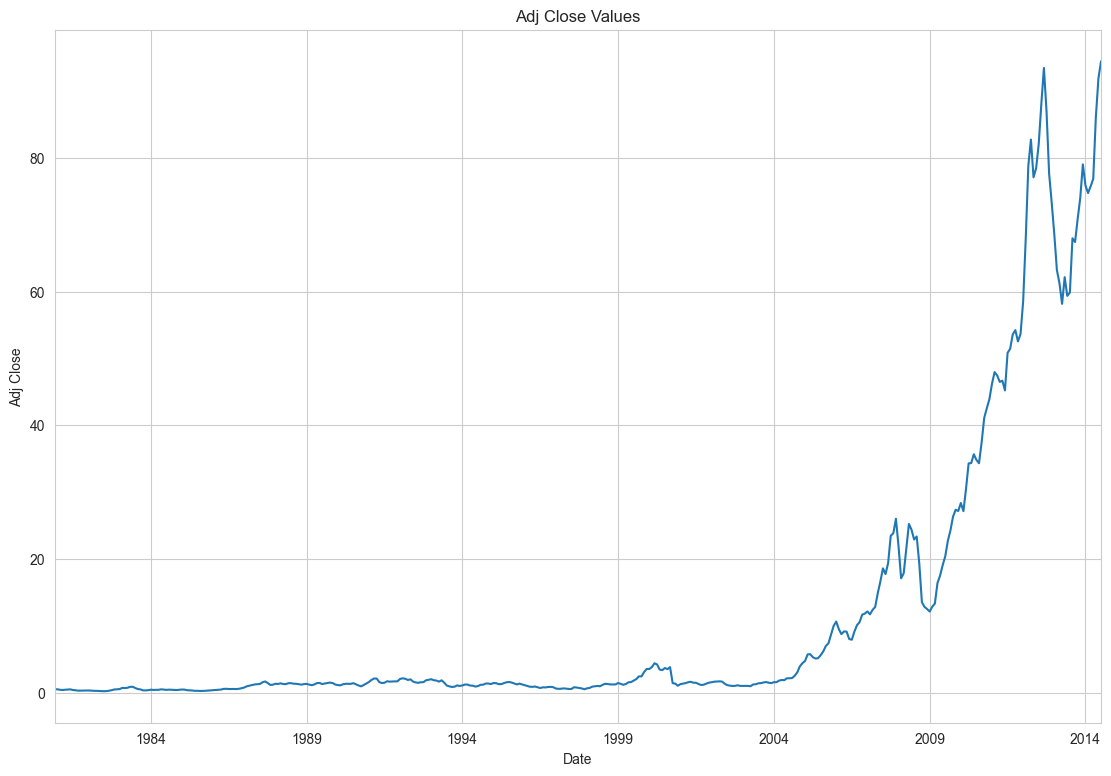

In [25]:
# Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

# Set the size of the figure
plt.figure(figsize=(13.5, 9))

# Plot the 'Adj Close' values
apple_month['Adj Close'].plot()

# Add title and labels
plt.title('Adj Close Values')
plt.xlabel('Date')
plt.ylabel('Adj Close')

# Display the plot
plt.show()